In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
data_file= pd.read_csv('./advertising.csv')

In [4]:
data_file.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data_file.shape

(200, 4)

In [8]:
data_file.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
data_file.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

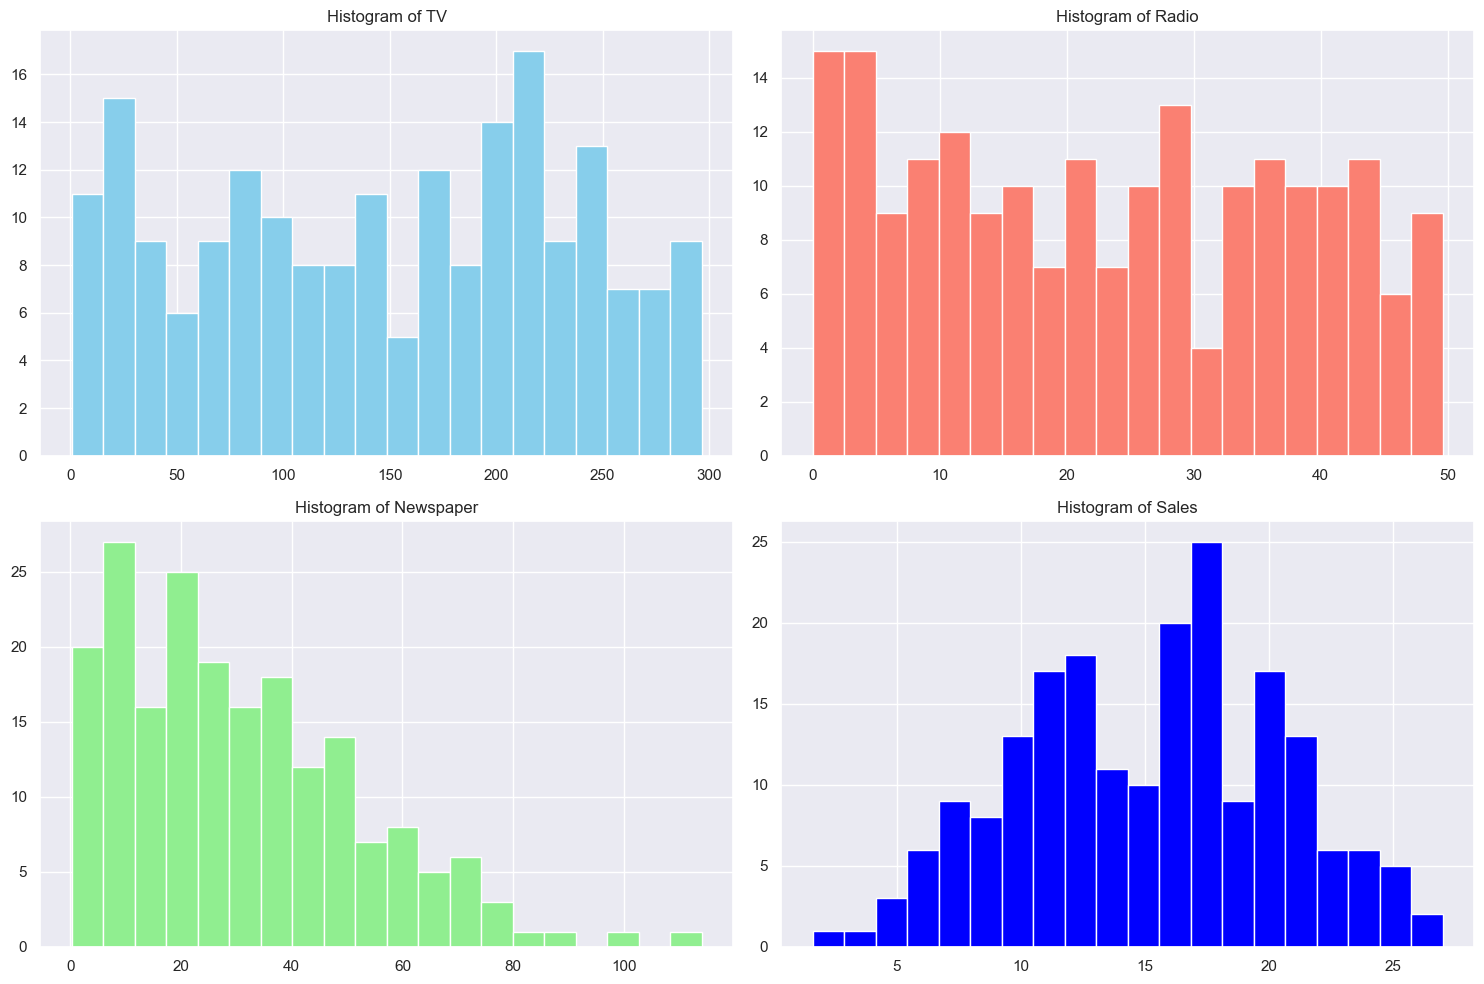

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid of subplots

# Histogram for 'TV'
axs[0, 0].hist(data_file['TV'], bins=20, color='skyblue')
axs[0, 0].set_title('Histogram of TV')

# Histogram for 'Radio'
axs[0, 1].hist(data_file['Radio'], bins=20, color='salmon')
axs[0, 1].set_title('Histogram of Radio')

# Histogram for 'Newspaper'
axs[1, 0].hist(data_file['Newspaper'], bins=20, color='lightgreen')
axs[1, 0].set_title('Histogram of Newspaper')

# Histogram for 'Sales'
axs[1, 1].hist(data_file['Sales'], bins=20, color='blue')
axs[1, 1].set_title('Histogram of Sales')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Text(0.5, 1.02, 'Scatter Plots of TV, Radio, and Newspaper vs. Sales')

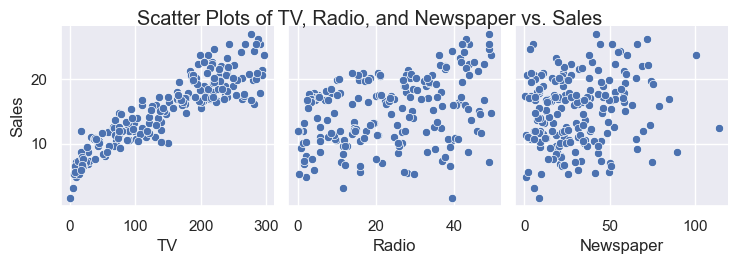

In [23]:
sns.pairplot(data_file,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.suptitle('Scatter Plots of TV, Radio, and Newspaper vs. Sales', y=1.02)

<Axes: >

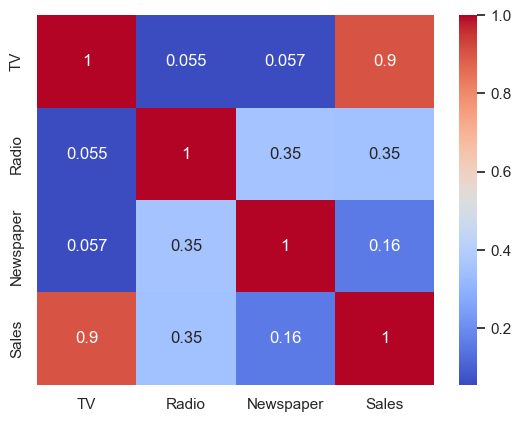

In [24]:
sns.heatmap(data_file.corr(),annot=True,cmap='coolwarm')

#### les dépenses en publicité télévisée sont fortement liées à l'augmentation des ventes.

In [25]:
X = data_file.drop(columns='Sales')
Y = data_file['Sales']

In [27]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=3)  # 25% pour le test


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np


(1.0694941530287325, 1.4508475076247238, 0.9331097441805323)

In [ ]:

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=3)
gb_model.fit(X_train, Y_train)

# Predicting the test set results with Gradient Boosting
Y_pred_gb = gb_model.predict(X_test)

# Evaluating the Gradient Boosting model
mae_gb = mean_absolute_error(Y_test, Y_pred_gb)
mse_gb = mean_squared_error(Y_test, Y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(Y_test, Y_pred_gb)

mae_gb, rmse_gb, r2_gb
